In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split
from lesson_functions import *
%matplotlib inline

/home/titee/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


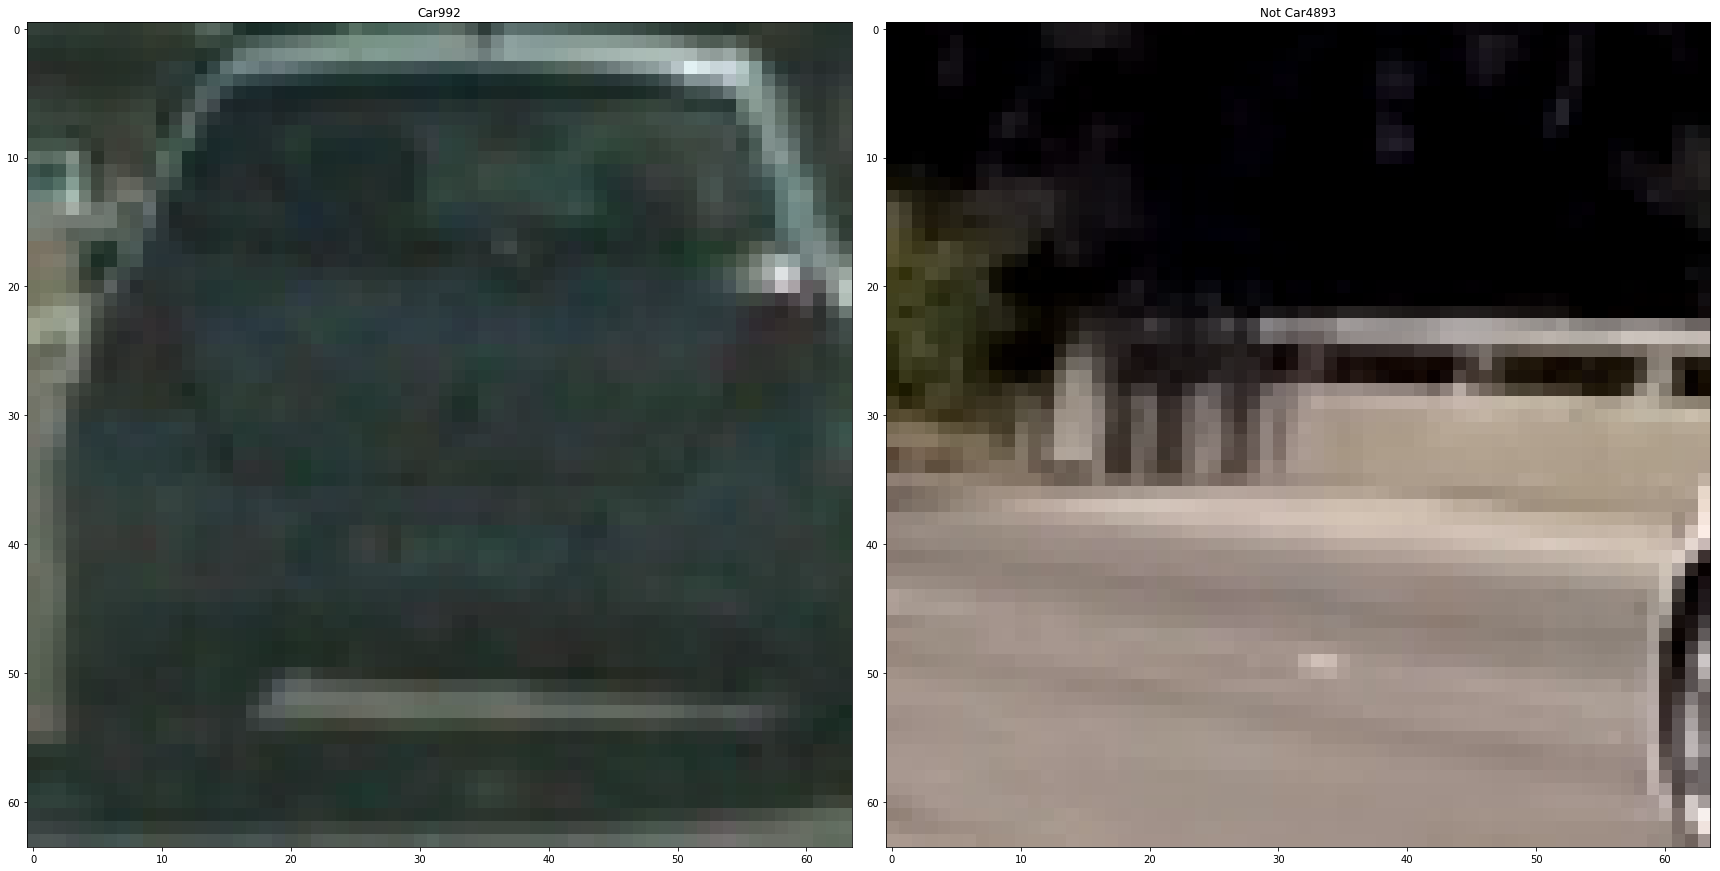

In [2]:
# get all image
all_cars = []
all_notcars = []
car_images = glob.glob('./vehicles/**/*.png')
for image in car_images:
    all_cars.append(image)
    
noncar_images = glob.glob('./non-vehicles/**/*.png')
for image in noncar_images:
    all_notcars.append(image)

# show some image
car_ind = np.random.randint(0, len(all_cars))
notcar_ind = np.random.randint(0, len(all_notcars))

car_img = mpimg.imread(all_cars[car_ind])
notcar_img = mpimg.imread(all_notcars[notcar_ind])

fig = plt.figure(figsize=(24, 24))
plt.subplot(121)
plt.imshow(car_img)
plt.title('Car' + str(car_ind))
plt.subplot(122)
plt.imshow(notcar_img)
plt.title('Not Car' + str(notcar_ind))
fig.tight_layout()

/home/titee/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


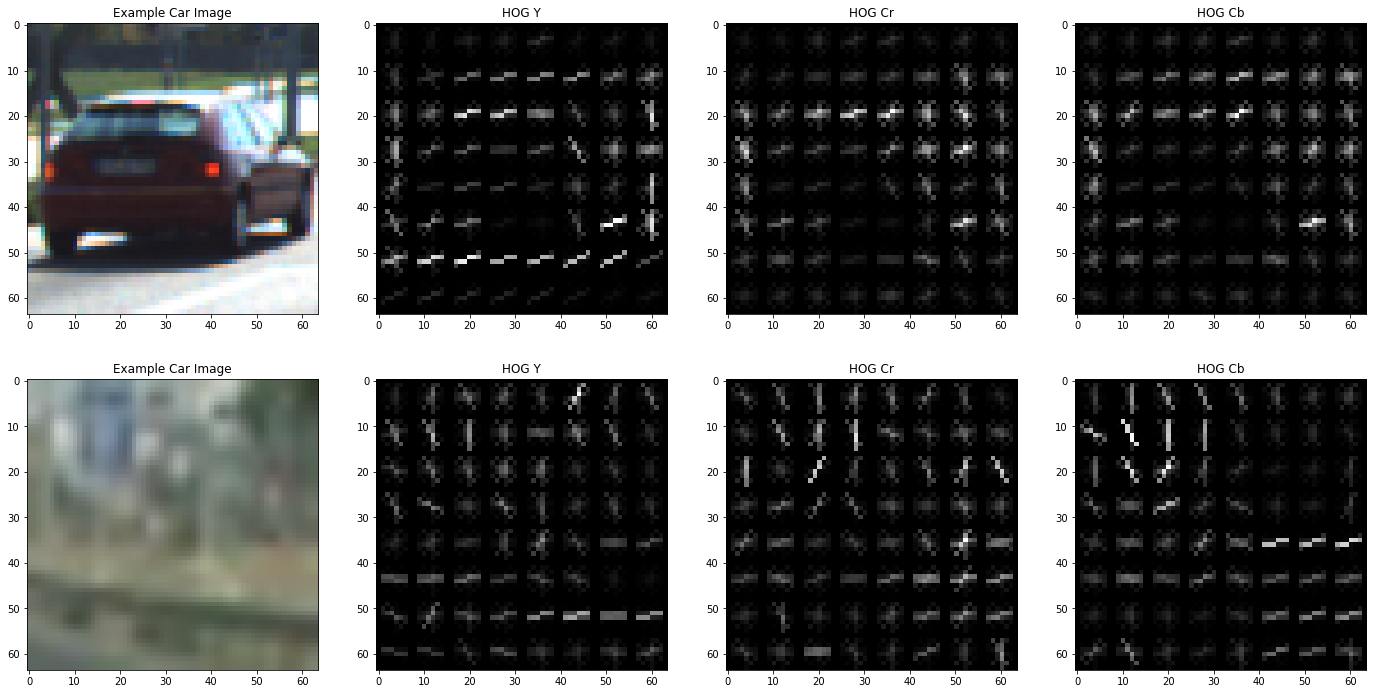

In [3]:
# Generate a random index to look at a car image
car_ind = np.random.randint(0, len(all_cars))
notcar_ind = np.random.randint(0, len(all_notcars))

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Read in the image
car_img = mpimg.imread(all_cars[car_ind])
notcar_img = mpimg.imread(all_notcars[notcar_ind])
car_colored = convert_color(car_img, color_space)  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
notcar_colored = convert_color(notcar_img, color_space)


# Call our function with vis=True to see an image output
car_feature_y, car_hog_image_y = get_hog_features(car_colored[:,:,0], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)
car_feature_cr, car_hog_image_cr = get_hog_features(car_colored[:,:,1], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)
car_feature_cb, car_hog_image_cb = get_hog_features(car_colored[:,:,2], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)
notcar_feature_y, notcar_hog_image_y = get_hog_features(notcar_colored[:,:,0], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)
notcar_feature_cr, notcar_hog_image_cr = get_hog_features(notcar_colored[:,:,1], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)
notcar_feature_cb, notcar_hog_image_cb = get_hog_features(notcar_colored[:,:,2], orient= orient, 
                        pix_per_cell= pix_per_cell, cell_per_block= cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes[0][0].imshow(car_img, cmap='gray')
axes[0][0].set_title('Example Car Image')
axes[0][1].imshow(car_hog_image_y, cmap='gray')
axes[0][1].set_title('HOG Y')
axes[0][2].imshow(car_hog_image_cr, cmap='gray')
axes[0][2].set_title('HOG Cr')
axes[0][3].imshow(car_hog_image_cb, cmap='gray')
axes[0][3].set_title('HOG Cb')
axes[1][0].imshow(notcar_img, cmap='gray')
axes[1][0].set_title('Example Car Image')
axes[1][1].imshow(notcar_hog_image_y, cmap='gray')
axes[1][1].set_title('HOG Y')
axes[1][2].imshow(notcar_hog_image_cr, cmap='gray')
axes[1][2].set_title('HOG Cr')
axes[1][3].imshow(notcar_hog_image_cb, cmap='gray')
axes[1][3].set_title('HOG Cb')

In [4]:
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True


print('color_space :', color_space)
print('hog_channel :', hog_channel)

cars = all_cars
notcars = all_notcars
print('sample_size :', len(cars) + len(notcars))

t=time.time()
car_features = extract_features(cars, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print('car features :', len(car_features))
print('notcar features :', len(car_features))
print(round(t2-t, 2), 'Seconds to extract HOG features...')

# Create an array stack of feature vectors
X = np.concatenate((car_features, notcar_features), axis=0)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Train Accuracy of SVC = ', round(svc.score(X_train, y_train), 4))
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
print('---------------------------------------------------------------------------')

color_space : YCrCb
hog_channel : ALL
sample_size : 17760


/home/titee/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


car features : 8792
notcar features : 8792
70.57 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6156
13.7 Seconds to train SVC...
Train Accuracy of SVC =  1.0
Test Accuracy of SVC =  0.9887
My SVC predicts:  [ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
For these 10 labels:  [ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
0.00154 Seconds to predict 10 labels with SVC
---------------------------------------------------------------------------


In [5]:
import pickle
# save the model to disk
filename = 'finalized_svc.sav'

with open(filename, 'wb') as pfile:
    pickle.dump(
        {   'svc':svc, 
            'X_scaler': X_scaler,
            'color_space': color_space,
            'spatial_size': spatial_size,
            'hist_bins': hist_bins,
            'orient': orient,
            'pix_per_cell': pix_per_cell,
            'cell_per_block': cell_per_block,
            'hog_channel': hog_channel,
            'spatial_feat': spatial_feat,
            'hist_feat': hist_feat,
            'hog_feat':hog_feat
        },
        pfile, pickle.HIGHEST_PROTOCOL)